In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [7]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.shape

(15509, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
df = df.dropna(thresh=int(0.7 * df.shape[1]))
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

<ipython-input-12-3c705be5bd65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
<ipython-input-12-3c705be5bd65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
if 'Director' in df.columns and 'Rating' in df.columns:
    director_avg = df.groupby('Director')['Rating'].mean()
    df['Director_Avg_Rating'] = df['Director'].map(director_avg)

if 'Genre' in df.columns and 'Rating' in df.columns:
    genre_avg = df.groupby('Genre')['Rating'].mean()
    df['Genre_Avg_Rating'] = df['Genre'].map(genre_avg)

In [15]:
assert 'Rating' in df.columns, "Rating column missing!"
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

In [31]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf')
}

In [32]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"\n{name}")
    print("RMSE:", round(rmse, 4))
    print("R² Score:", round(r2, 4))


Random Forest
RMSE: 0.7402
R² Score: 0.5709

Linear Regression
RMSE: 0.7517
R² Score: 0.5574

Gradient Boosting
RMSE: 0.7289
R² Score: 0.5838

SVR (RBF Kernel)
RMSE: 0.758
R² Score: 0.5499


In [33]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2 Score"])
print("\nModel Comparison:\n", results_df)


Model Comparison:
                Model      RMSE  R2 Score
0      Random Forest  0.740187  0.570857
1  Linear Regression  0.751703  0.557401
2  Gradient Boosting  0.728901  0.583844
3   SVR (RBF Kernel)  0.758043  0.549903


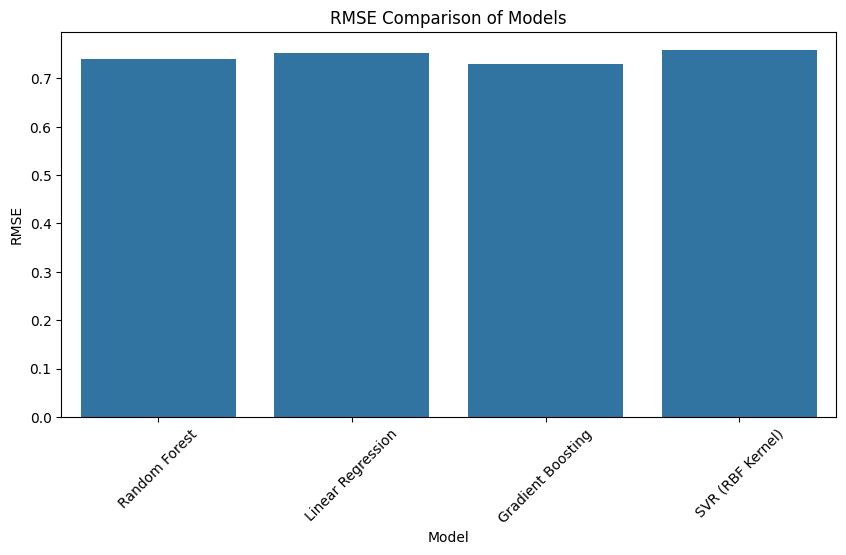

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("RMSE Comparison of Models")
plt.xticks(rotation=45)
plt.show()

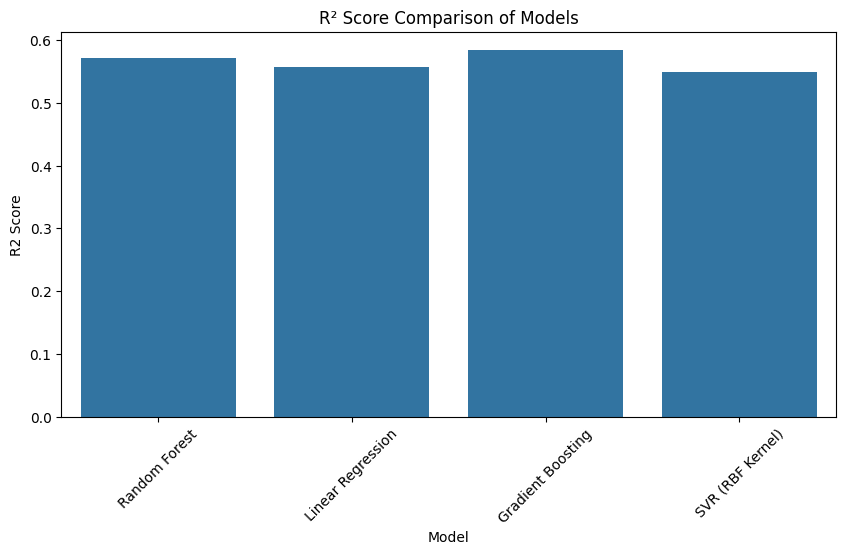

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.title("R² Score Comparison of Models")
plt.xticks(rotation=45)
plt.show()

In [36]:
best_model = sorted(results, key=lambda x: x[1])[0][0]
print(f"\nBest Model based on RMSE: {best_model}")


Best Model based on RMSE: Gradient Boosting
